ZADANIE 1
Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .

In [ ]:
import numpy as np

np.random.seed(42) # Ustawienie ziarna dla powtarzalności

# Generowanie danych x
x = 2 * np.random.rand(1000, 1)

# Definiowanie prawdziwych parametrów liniowej zależności
a_prawdziwe = 5
b_prawdziwe = 2

# Generowanie szumu
szum = np.random.normal(0, 1, (1000, 1))

# Generowanie danych y z szumem
y = a_prawdziwe * x + b_prawdziwe + szum

In [ ]:
params = np.polyfit(x.flatten(), y.flatten(), 1)

a_fitted = params[0]
b_fitted = params[1]

print(f"Fitted slope (a): {a_fitted}")
print(f"Fitted intercept (b): {b_fitted}")

Fitted slope (a): 4.922607418472327
Fitted intercept (b): 2.1747802584930995


In [ ]:
print(f"Znaleziony parametr a: {a_fitted}")
print(f"Znaleziony parametr b: {b_fitted}")

Znaleziony parametr a: 4.922607418472327
Znaleziony parametr b: 2.1747802584930995


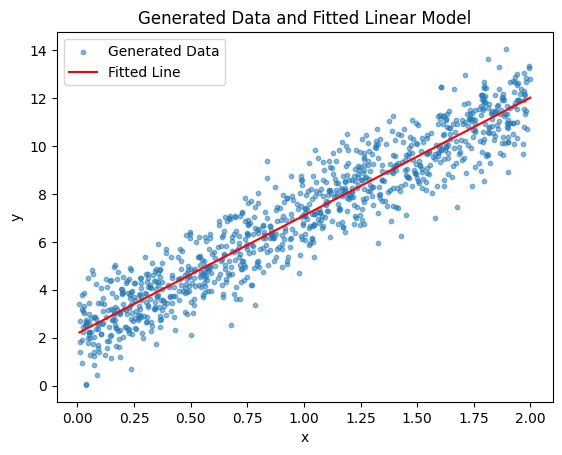

In [ ]:
import matplotlib.pyplot as plt


plt.scatter(x, y, label='Generated Data', alpha=0.5, s=10)

x_line = np.linspace(min(x), max(x), 100)
y_line = a_fitted * x_line + b_fitted

plt.plot(x_line, y_line, color='red', label='Fitted Line')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data and Fitted Linear Model')

plt.legend()
plt.show()

ZADANIE 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

In [ ]:
import pandas as pd
df = pd.read_csv('LungDisease.csv')
df.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

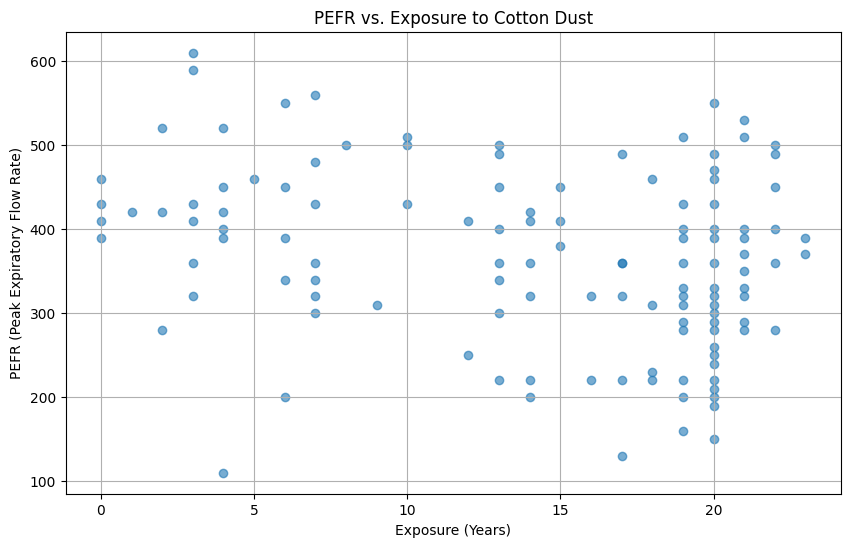

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['Exposure'], df['PEFR'], alpha=0.6)
plt.xlabel('Exposure (Years)')
plt.ylabel('PEFR (Peak Expiratory Flow Rate)')
plt.title('PEFR vs. Exposure to Cotton Dust')
plt.grid(True)
plt.show()

Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

In [ ]:
correlation_coefficient = df['Exposure'].corr(df['PEFR'], method='pearson')
print(f"Współczynnik korelacji Pearsona między Exposure a PEFR wynosi: {correlation_coefficient}")

Współczynnik korelacji Pearsona między Exposure a PEFR wynosi: -0.2770217010684072


Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

In [ ]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Exposure'], df['PEFR'])

print(f"Nachylenie (slope): {slope}")
print(f"Punkt przecięcia z osią y (intercept): {intercept}")

Nachylenie (slope): -4.1845764854614425
Punkt przecięcia z osią y (intercept): 424.582806573957


In [ ]:
exposure_range = np.linspace(df['Exposure'].min(), df['Exposure'].max(), 100)
pefr_line = slope * exposure_range + intercept

print("Generated points for the regression line:")
print(f"Exposure points: {exposure_range[:5]}...")
print(f"PEFR points: {pefr_line[:5]}...")

Generated points for the regression line:
Exposure points: [0.         0.23232323 0.46464646 0.6969697  0.92929293]...
PEFR points: [424.58280657 423.61063224 422.6384579  421.66628357 420.69410923]...


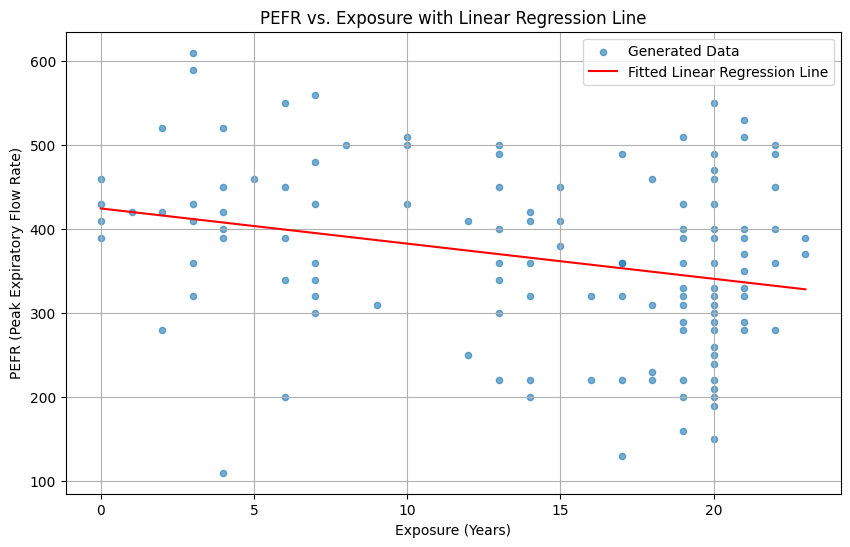

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Exposure'], df['PEFR'], label='Generated Data', alpha=0.6, s=20)
plt.plot(exposure_range, pefr_line, color='red', label='Fitted Linear Regression Line')
plt.xlabel('Exposure (Years)')
plt.ylabel('PEFR (Peak Expiratory Flow Rate)')
plt.title('PEFR vs. Exposure with Linear Regression Line')
plt.legend()
plt.grid(True)
plt.show()

ZADANIE 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

In [ ]:
import pandas as pd

df = pd.read_csv('anscombe.csv', header=1)
df.columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']
display(df.head())

,x1,y1,x2,y2,x3,y3,x4,y4
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

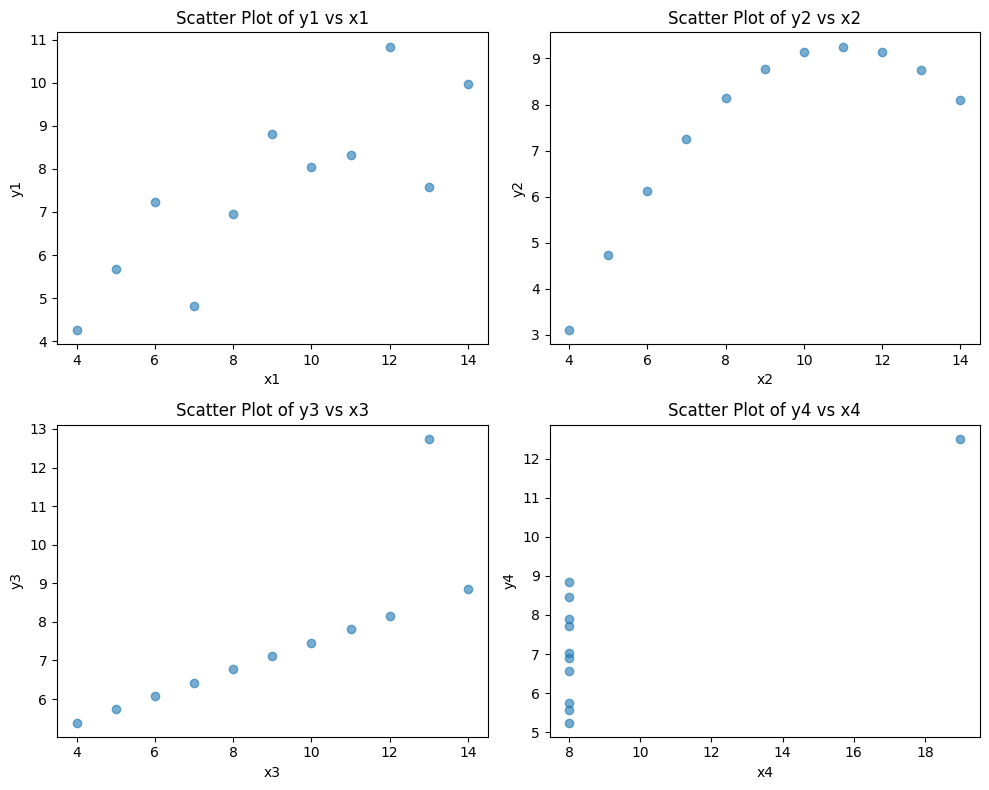

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()  # Flatten the 2x2 grid of axes to an array

data_pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

for i, (x_col, y_col) in enumerate(data_pairs):
    axes[i].scatter(df[x_col], df[y_col], alpha=0.6)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    axes[i].set_title(f'Scatter Plot of {y_col} vs {x_col}')

plt.tight_layout()
plt.show()

**Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

In [ ]:
from scipy import stats

data_pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]
results ={}
for x_col, y_col in data_pairs:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[x_col], df[y_col])
    results[f'{x_col}-{y_col}'] = {
        'slope (a)': slope,
        'intercept (b)': intercept,
        'standard error of slope': std_err
    }

for pair, params in results.items():
    print(f"Linear regression for {pair}:")
    print(f"  Slope (a): {params['slope (a)']:.4f}")
    print(f"  Intercept (b): {params['intercept (b)']:.4f}")
    print(f"  Standard error of slope: {params['standard error of slope']:.4f}")

Linear regression for x1-y1:
  Slope (a): 0.5001
  Intercept (b): 3.0001
  Standard error of slope: 0.1179
Linear regression for x2-y2:
  Slope (a): 0.5000
  Intercept (b): 3.0009
  Standard error of slope: 0.1180
Linear regression for x3-y3:
  Slope (a): 0.4997
  Intercept (b): 3.0025
  Standard error of slope: 0.1179
Linear regression for x4-y4:
  Slope (a): 0.4999
  Intercept (b): 3.0017
  Standard error of slope: 0.1178


4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

In [ ]:
data_pairs = [('x1', 'y1'), ('x2', 'y2'), ('x3', 'y3'), ('x4', 'y4')]

correlation_results = {}
for x_col, y_col in data_pairs:
    correlation = df[x_col].corr(df[y_col], method='pearson')
    correlation_results[f'{x_col}-{y_col}'] = correlation

for pair, corr in correlation_results.items():
    print(f"Współczynnik korelacji Pearsona dla {pair}: {corr:.4f}")

Współczynnik korelacji Pearsona dla x1-y1: 0.8164
Współczynnik korelacji Pearsona dla x2-y2: 0.8162
Współczynnik korelacji Pearsona dla x3-y3: 0.8163
Współczynnik korelacji Pearsona dla x4-y4: 0.8165
